# Lecture 14 Graphing
__Math 3080: Fundamentals of Data Science__

Reading:
* [McKinney: Chapter 9](https://wesmckinney.com/book/plotting-and-visualization)
* [Irizzary: Chapter 7](https://rafalab.dfci.harvard.edu/dsbook-part-1/dataviz/distributions.html)

-----
## Intro to Exploratory Data Analysis

`matplotlib` is the basic package we use for data visualization. There are other packages that are built on matplotlib (like `seaborn`), and other packages which are independent of matplotlib (like some interactive graphs we'll see later). Today, we'll learn the basics of matplotlib.

First, load matplotlib. Let's also create a simple dataset we can work with:

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
print(x)
y = x**2 + np.random.randn(len(x))/50
print(y)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[-0.03050147 -0.0419865  -0.00477506  0.01689748  0.00544625  0.02390633
  0.00256888  0.00399636 -0.02702741  0.01688121  0.0188593   0.05904989
 -0.00243954 -0.01691986  0.01578736  0.02707249  0.03247717  0.02458096
  0.03571269  0.04374825  0.04881093  0.05014959  0.05661874  0.05558586
  0.04844678  0.02681983  0.09314983  0.08054965  0.1203032   0.10726143
  0.10972076  0.09241413  0.09875052  0.13576345  0.12176924  0.10463005
  0.13854228  0.13923044  0.13468324  0.1508446 

Now, we need to create a frame for our figure and a set of axes:

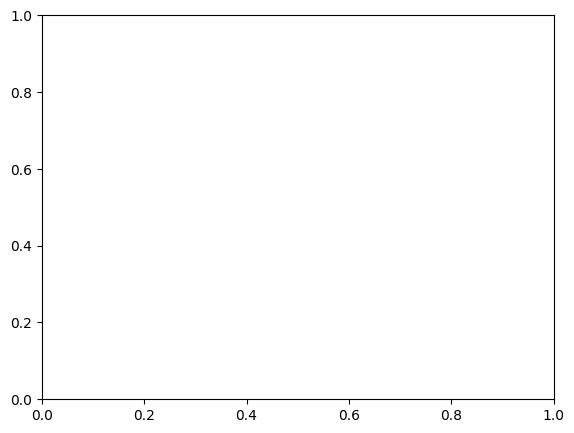

In [28]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
plt.show()

From here, we can go ahead and graph our data, or we can set up the environment some more. Here is a quick graph using our data.

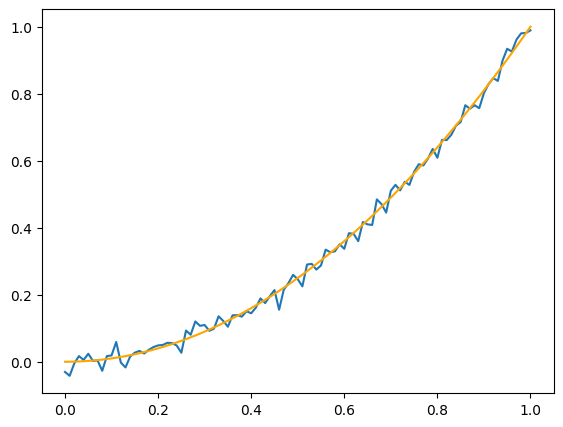

In [32]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x,y)
plt.show()

We can add information to the graph. For example, let's add a $y=x^2$ line, a title, axis labels, and a legend. And let's make the $y=x^2$ line dashed.

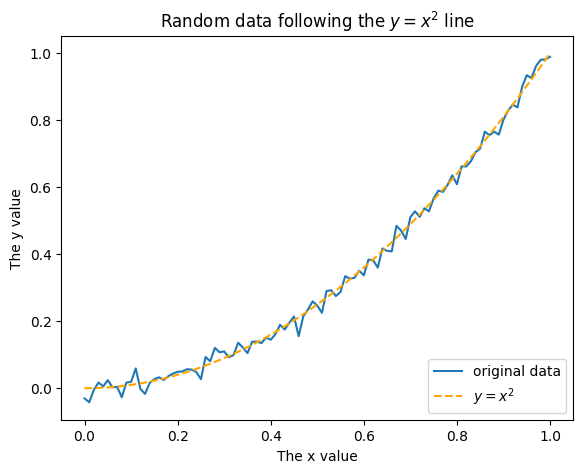

In [47]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(x,y, label='original data')
ax.plot(x,x**2,c='orange', linestyle='dashed', label='$y=x^2$')

plt.xlabel('The x value')
plt.ylabel('The y value')
plt.title('Random data following the $y=x^2$ line')

ax.legend(loc='lower right')
plt.show()

Now, let's say that we want an inset, like a zoom-in view, of the range $x=[0.4,0.5]$.

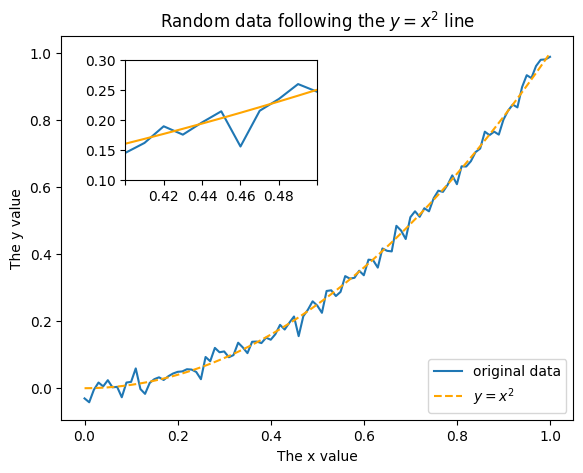

In [49]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

ax.plot(x,y, label='original data')
ax.plot(x,x**2,c='orange', linestyle='dashed', label='$y=x^2$')

plt.xlabel('The x value')
plt.ylabel('The y value')
plt.title('Random data following the $y=x^2$ line')

ax_inset = fig.add_axes([0.2, 0.6, 0.3, 0.25]) # left, bottom, width, height (range 0 to 1)

ax_inset.plot(x,y)
ax_inset.plot(x,x**2,c='orange')
ax_inset.set_xlim([0.4,0.5])
ax_inset.set_ylim([0.1,0.3])

ticks = ax_inset.set_xticks([0.4,0.42,0.44,0.46,0.48,0.5])
labels = ax_inset.set_xticklabels(['','0.42','0.44','0.46','0.48',''])

ax.legend(loc='lower right')
plt.show()

Import a dataset that has quantitative and categorical variables

Still to cover:
* Scatterplots
* Histograms
* Boxplots
* Barplot (`.bar()` and `.barh()`)
* Timeseries
* Subplots
* Seaborn

```python
fig, ax = plt.subplots(1,3, sharey=True)
ax[0].plot()
ax[1].plot()
ax[2].plot()
```

```python
fig, ax = plt.subplots(2,3, sharey=False, sharex=True)
ax[0,0].plot() # Row 0, Column 0
ax[0,1].plot() # Row 0, Column 1
ax[1,0].plot() # Row 1, Column 0
ax[1,1].plot() # Row 1, Column 1
```

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')

tips.head()